In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# CIFAR10 데이터셋

CIFAR10 데이터셋에 관해.

이 데이터셋은 6K 이미지들로 구성된 클래스를 10개 갖는 60K 32*32 컬러 이미지들로 구성되어있습니다. 학습 이미지는 50K, 테스트 이미지는 10K이고, 각각 랜덤으로 섞인 클래스들로 구성된 batch를 5개, 1개 가집니다. 이미 전처리가 깔끔하게 되어있네요!

클래스 10개의 이름은:

```
'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'.
```

In [2]:
# 데이터 로드

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [3]:
train_images.shape

(50000, 32, 32, 3)

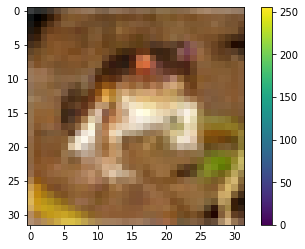

In [4]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
# 픽셀값들을 0과 1사이의 값으로 정규화하

train_images, test_images = train_images / 255.0, test_images / 255.0

이미지 10개를 띄우고, 각 이미지 밑에 클래스 이름 표시

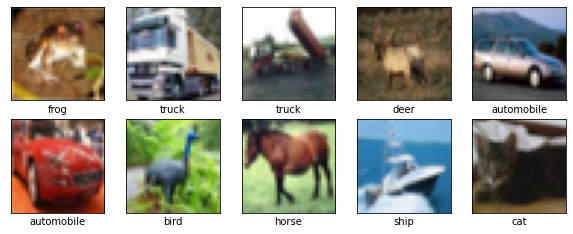

In [8]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## 컨볼루션 만들기


In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

##### (1) `conv2d_6 (Conv2D)            (None, 30, 30, 32)        896`

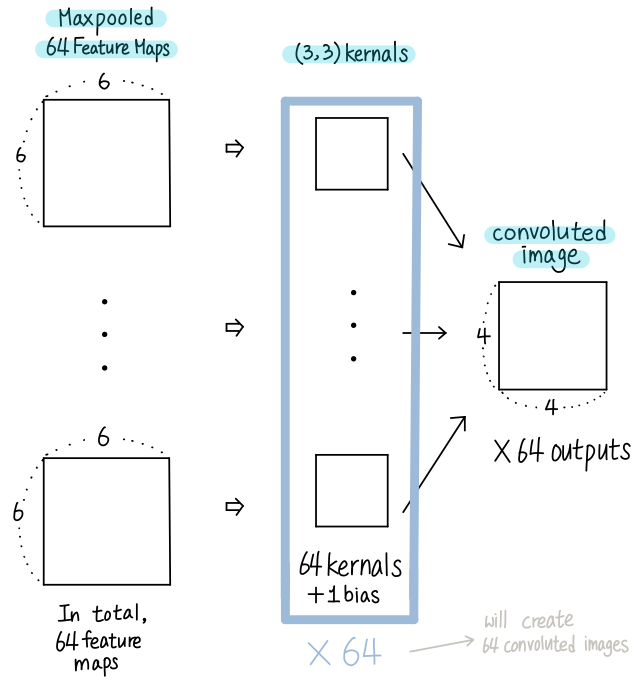


##### (2) `conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496`



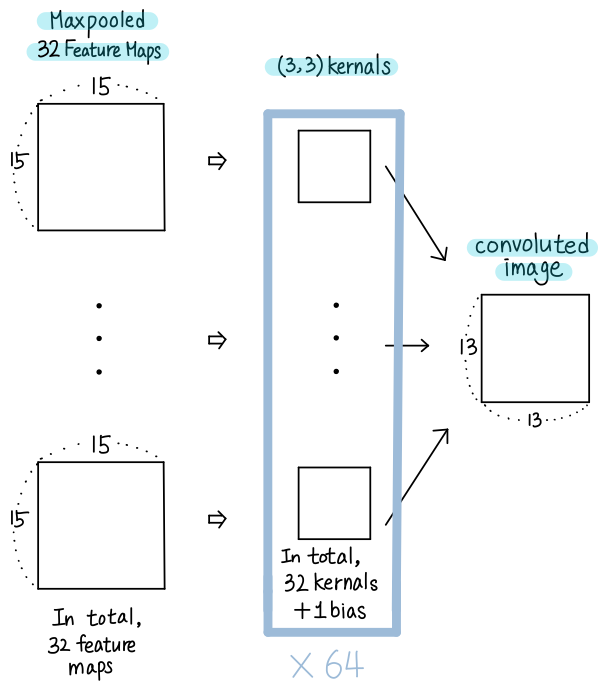



## 학습



In [11]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 9s 178us/sample - loss: 1.5388 - accuracy: 0.4377 - val_loss: 1.2833 - val_accuracy: 0.5317
Epoch 2/10
50000/50000 [==============================] - 6s 123us/sample - loss: 1.1555 - accuracy: 0.5906 - val_loss: 1.0820 - val_accuracy: 0.6126
Epoch 3/10
50000/50000 [==============================] - 6s 123us/sample - loss: 1.0156 - accuracy: 0.6434 - val_loss: 1.0159 - val_accuracy: 0.6440
Epoch 4/10
50000/50000 [==============================] - 6s 122us/sample - loss: 0.9138 - accuracy: 0.6786 - val_loss: 0.9345 - val_accuracy: 0.6782
Epoch 5/10
50000/50000 [==============================] - 6s 123us/sample - loss: 0.8410 - accuracy: 0.7059 - val_loss: 0.9205 - val_accuracy: 0.6821
Epoch 6/10
50000/50000 [==============================] - 6s 123us/sample - loss: 0.7799 - accuracy: 0.7278 - val_loss: 0.9224 - val_accuracy: 0.6880
Epoch 7/10
50000/50000 [==========================

In [12]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

10000/10000 - 1s - loss: 0.9216 - accuracy: 0.6964


## 정리

https://medium.com/@ericabae/tensorflow-2-0-합성곱-신경망-cnn-bfd925298c9b

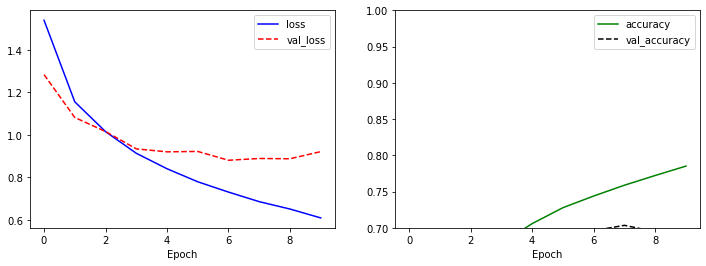

ValueError: Error when checking input: expected conv2d_3_input to have 4 dimensions, but got array with shape (50000, 1)

In [14]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(train_labels, test_labels, verbose=0)